In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.join(
    os.environ["RNB_PLANNING_DIR"], 'src')))

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pkg.utils.nonholo_utils import *

In [4]:
x1 = (1,1,np.pi/4)
x2 = (1,0,np.pi*3/4)
min_radi = 0.01

In [5]:
L = dist_nonholo(x1, x2, min_radi)
L

1.1107207345395917

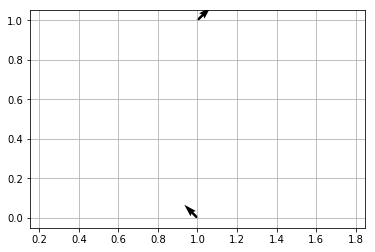

In [6]:

T1 = SE2(Rot_axis(3, x1[2])[:2,:2], x1[:2])
T2 = SE2(Rot_axis(3, x2[2])[:2,:2], x2[:2])
plt.quiver([x1[0], x2[0]], [x1[1], x2[1]], 
           [T1[0,0], T2[0,0]], 
           [T1[1,0], T2[1,0]])
plt.axis("equal")
plt.grid()

In [7]:
y12, y21, theta, R, T1, T2 = get_nonholo_trajargs(x1, x2)

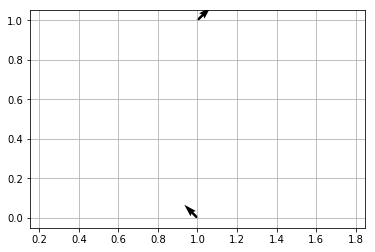

In [8]:
plt.quiver([T[0,2] for T in [T1, T2]], 
           [T[1,2] for T in [T1, T2]], 
           [T[0,0] for T in [T1, T2]], 
           [T[1,0] for T in [T1, T2]])
plt.axis("equal")
plt.grid()

In [9]:
T_list = interpolate_nonholo(y12, y21, theta, R, T1, T2, min_radi=min_radi, step_size=0.01)

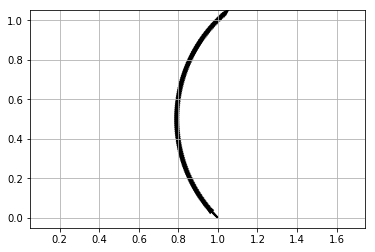

In [10]:
plt.quiver([T[0,2] for T in T_list], 
           [T[1,2] for T in T_list], 
           [T[0,0] for T in T_list], 
           [T[1,0] for T in T_list])
plt.axis("equal")
plt.grid()

In [11]:
Xgoal = (1,1,1)
timeout=1
t_s = time.time()
mins = (-2,-2,-np.pi)
maxs = (2,2,np.pi)
nodes = [(0,0,0)]
edges = []
step_size = 0.01
connect_dist = 0.1
while time.time()-t_s<timeout:
    Xnew = np.random.uniform(mins, maxs)
    if False: # validate
        continue
    Xnear = sorted(nodes, key=lambda x: dist_nonholo(Xnew, x, min_radi))[0]
    y12, y21, theta, R, T1, T2 = get_nonholo_trajargs(Xnear, Xnew)
    T_list = interpolate_nonholo(y12, y21, theta, R, T1, T2, min_radi=min_radi, step_size=step_size)
    if not T_list:
        continue
    traj = [T[:2,2].tolist()+[np.arctan2(T[1,0], T[0,0])] for T in T_list]
    traj

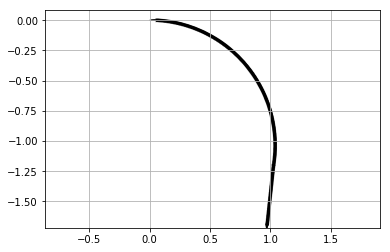

In [14]:
plt.quiver([T[0,2] for T in T_list], 
           [T[1,2] for T in T_list], 
           [T[0,0] for T in T_list], 
           [T[1,0] for T in T_list])
plt.axis("equal")
plt.grid()